#### The dataset I use:  Nobel Prize Winners is from https://github.com/the-pudding/data.git
#### My research questions are
#### 1.Which countries have produced the most Nobel Prize winners and in which categories?
#### 2.Is there any difference the countries winners were born and where they live?
#### 3.Are there any gender disparities in the distribution of Nobel Prizes over time and across categories?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Load the Nobel Prize dataset
nobel_df = pd.read_csv("nobel-prize-winners.csv")

nobel_df.head()

,name,born,died,bornCountry_original,bornCountry_now,bornCity_original,bornCity_now,bornLocation,bornLong,bornLat,...,diedLong,diedLat,diedCoordinates,gender,year,category,motivation,institutionName,institutionCity,institutionCountry
0,Gerhart Johann Robert Hauptmann,1862-11-15,1946-06-06,Prussia (now Germany),Germany,Bad Salzbrunn,Bad Salzbrunn,"Bad Salzbrunn, Germany",NaN,NaN,...,15.617169,50.822107,"50.8221069, 15.6171685",male,1912,literature,"""primarily in recognition of his fruitful, var...",NaN,NaN,NaN
1,Dag Hjalmar Agne Carl Hammarskjöld,1905-07-29,1961-09-18,Sweden,Sweden,Jönköping,Jönköping,"Jönköping, Sweden",14.161788,57.782614,...,28.649814,-12.990641,"-12.9906407, 28.6498144",male,1961,peace,NaN,NaN,NaN,NaN
2,Ivo Andric,1892-10-10,1975-03-13,Bosnia (now Bosnia and Herzegovina),Bosnia and Herzegovina,Dolac,Dolac,"Dolac, Bosnia and Herzegovina",17.990100,44.086069,...,20.448922,44.786568,"44.786568, 20.4489216",male,1961,literature,"""for the epic force with which he has traced t...",NaN,NaN,NaN
3,Il´ja Mikhailovich Frank,1908-10-23,1990-06-22,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,37.617300,55.755826,"55.755826, 37.6172999",male,1958,physics,"""for the discovery and the interpretation of t...",University of Moscow,Moscow,USSR
4,Il´ja Mikhailovich Frank,1908-10-23,1990-06-22,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,37.617300,55.755826,"55.755826, 37.6172999",male,1958,physics,"""for the discovery and the interpretation of t...",P.N. Lebedev Physical Institute,Moscow,USSR


In [25]:
# the first question is: Which countries have produced the most Nobel Prize winners and in which categories?
# Group Nobel laureates by country and category, and count the number of winners in each group
winners_by_country = nobel_df.groupby(["bornCountry_original", "category"])["name"].count()

# Sort the results in descending order
winners_by_country = winners_by_country.sort_values(ascending=False)

# Select the top 10 countries with the most Nobel Prize winners
top_countries = winners_by_country.head(10)
top_countries

bornCountry_original  category 
USA                   medicine     78
                      physics      74
                      chemistry    57
                      economics    48
United Kingdom        medicine     26
Germany               chemistry    24
United Kingdom        physics      22
                      chemistry    22
Germany               physics      21
USA                   peace        19
Name: name, dtype: int64

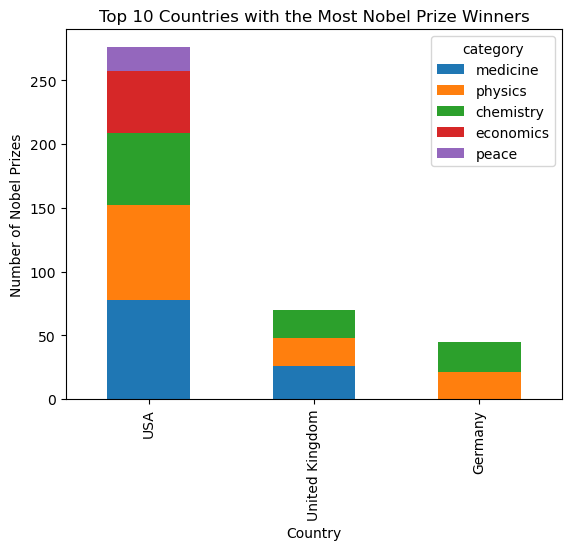

In [26]:
# Create a stacked bar chart of Nobel Prize winners by category for each top country
top_countries.unstack().plot(kind="bar", stacked=True)
plt.title("Top 10 Countries with the Most Nobel Prize Winners")
plt.xlabel("Country")
plt.ylabel("Number of Nobel Prizes")
plt.show()

# As we can see, most winners were born in USA with most categories.

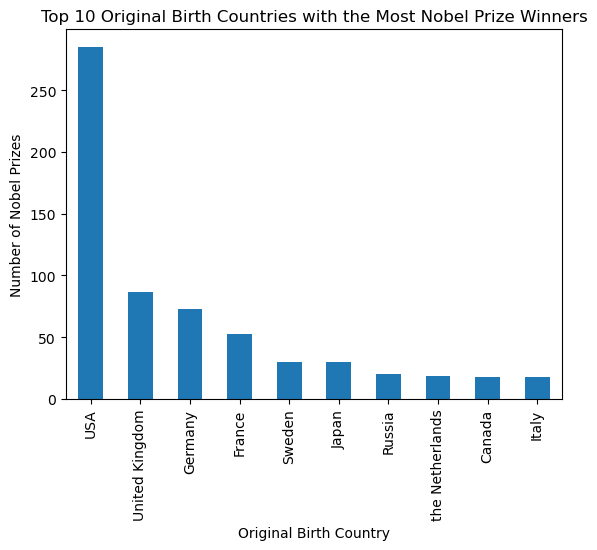

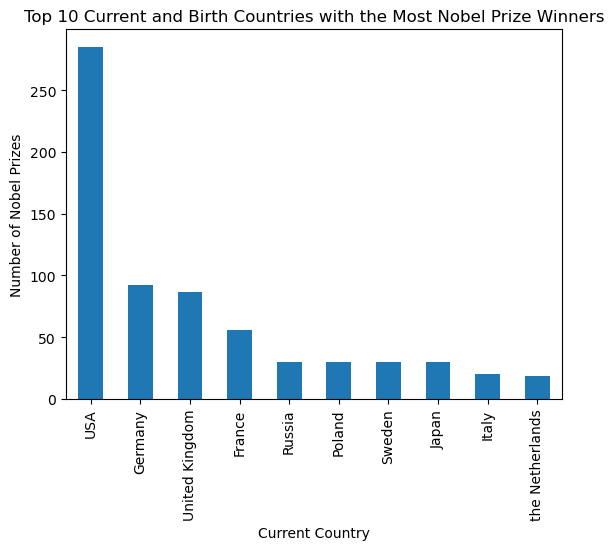

In [28]:
# Also, I'm curious about how the winners change thier conrties from original to current.

# Count the number of Nobel laureates by original birth country
original_country_counts = nobel_df["bornCountry_original"].value_counts()

# Select the top 10 original birth countries with the most Nobel Prize winners
top_original_countries = original_country_counts.head(10)

# Create a bar chart of Nobel Prize winners by original birth country
top_original_countries.plot(kind="bar")
plt.title("Top 10 Original Birth Countries with the Most Nobel Prize Winners")
plt.xlabel("Original Birth Country")
plt.ylabel("Number of Nobel Prizes")
plt.show()

# Count the number of Nobel laureates by current birth country
current_country_counts = nobel_df["bornCountry_now"].value_counts()

# Select the top 10 current birth countries with the most Nobel Prize winners
top_current_countries = current_country_counts.head(10)

# Create a bar chart of Nobel Prize winners by current birth country
top_current_countries.plot(kind="bar")
plt.title("Top 10 Current and Birth Countries with the Most Nobel Prize Winners")
plt.xlabel("Current Country")
plt.ylabel("Number of Nobel Prizes")
plt.show()


In [22]:
# Group Nobel laureates by gender and category, and count the number of winners in each group
winners_by_gender = nobel_df.groupby(["gender", "category"])["name"].count()

# Calculate the total number of Nobel Prize winners by gender
total_winners_by_gender = winners_by_gender.groupby("gender").sum()

# Calculate the percentage of Nobel Prize winners by gender and category
winners_pct_by_gender = winners_by_gender / total_winners_by_gender * 100
winners_pct_by_gender

gender  category  
female  chemistry      8.000000
        economics      4.000000
        literature    28.000000
        medicine      24.000000
        peace         32.000000
        physics        4.000000
male    chemistry     21.302428
        economics      9.050773
        literature    11.037528
        medicine      24.172185
        peace          9.492274
        physics       24.944812
Name: name, dtype: float64

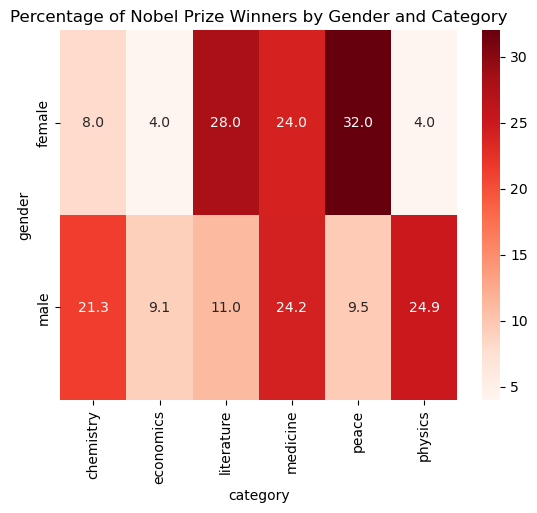

In [23]:
# Create a heatmap of the percentage of Nobel Prize winners by gender and category
sns.heatmap(winners_pct_by_gender.unstack(), annot=True, fmt=".1f", cmap="Reds")
plt.title("Percentage of Nobel Prize Winners by Gender and Category")
plt.xlabel("category")
plt.ylabel("gender")
plt.show()

#Intrestingly, we can see female winners are mostly distributed on literatur and peace.